# Modelos de Clasificación y Validación Cruzada

## 1. Librerias y configuraciones previas


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Creación de modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df.targetVar, ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df.targetVar, ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if tipo == 'c':
                sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
            if tipo == 'b':
                sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
            if tipo == 's':
                sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])
#plt.xticks(tick_marks, classes, rotation=45)

## 3. Carga del dataset

In [3]:
d=pd.read_csv('./datasets/02_GermanCredit_Prep.csv')

In [4]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [5]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1400 non-null   object
 1   loan_duration_mo          1400 non-null   int64 
 2   credit_history            1400 non-null   object
 3   purpose                   1400 non-null   object
 4   loan_amount               1400 non-null   int64 
 5   savings_account_balance   1400 non-null   object
 6   time_employed_yrs         1400 non-null   object
 7   payment_pcnt_income       1400 non-null   int64 
 8   gender_status             1400 non-null   object
 9   other_signators           1400 non-null   object
 10  time_in_residence         1400 non-null   int64 
 11  property                  1400 non-null   object
 12  age_yrs                   1400 non-null   int64 
 13  other_credit_outstanding  1400 non-null   object
 14  home_ownership          

## 4. Visualización de datos

### Variables de entrada

In [7]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,radio/television,unknown/none,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes
1,0 - 200 DM,current loans paid,radio/television,< 100 DM,1 - 4 years,female-divorced/separated/married,none,real estate,none,own,skilled,none,yes
2,none,critical account - other non-bank loans,education,< 100 DM,4 - 7 years,male-single,none,real estate,none,own,unskilled-resident,none,yes
3,< 0 DM,current loans paid,furniture/equipment,< 100 DM,4 - 7 years,male-single,guarantor,building society savings/life insurance,none,for free,skilled,none,yes
4,< 0 DM,past payment delays,car,< 100 DM,1 - 4 years,male-single,none,unknown-none,none,for free,skilled,none,yes


In [8]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1


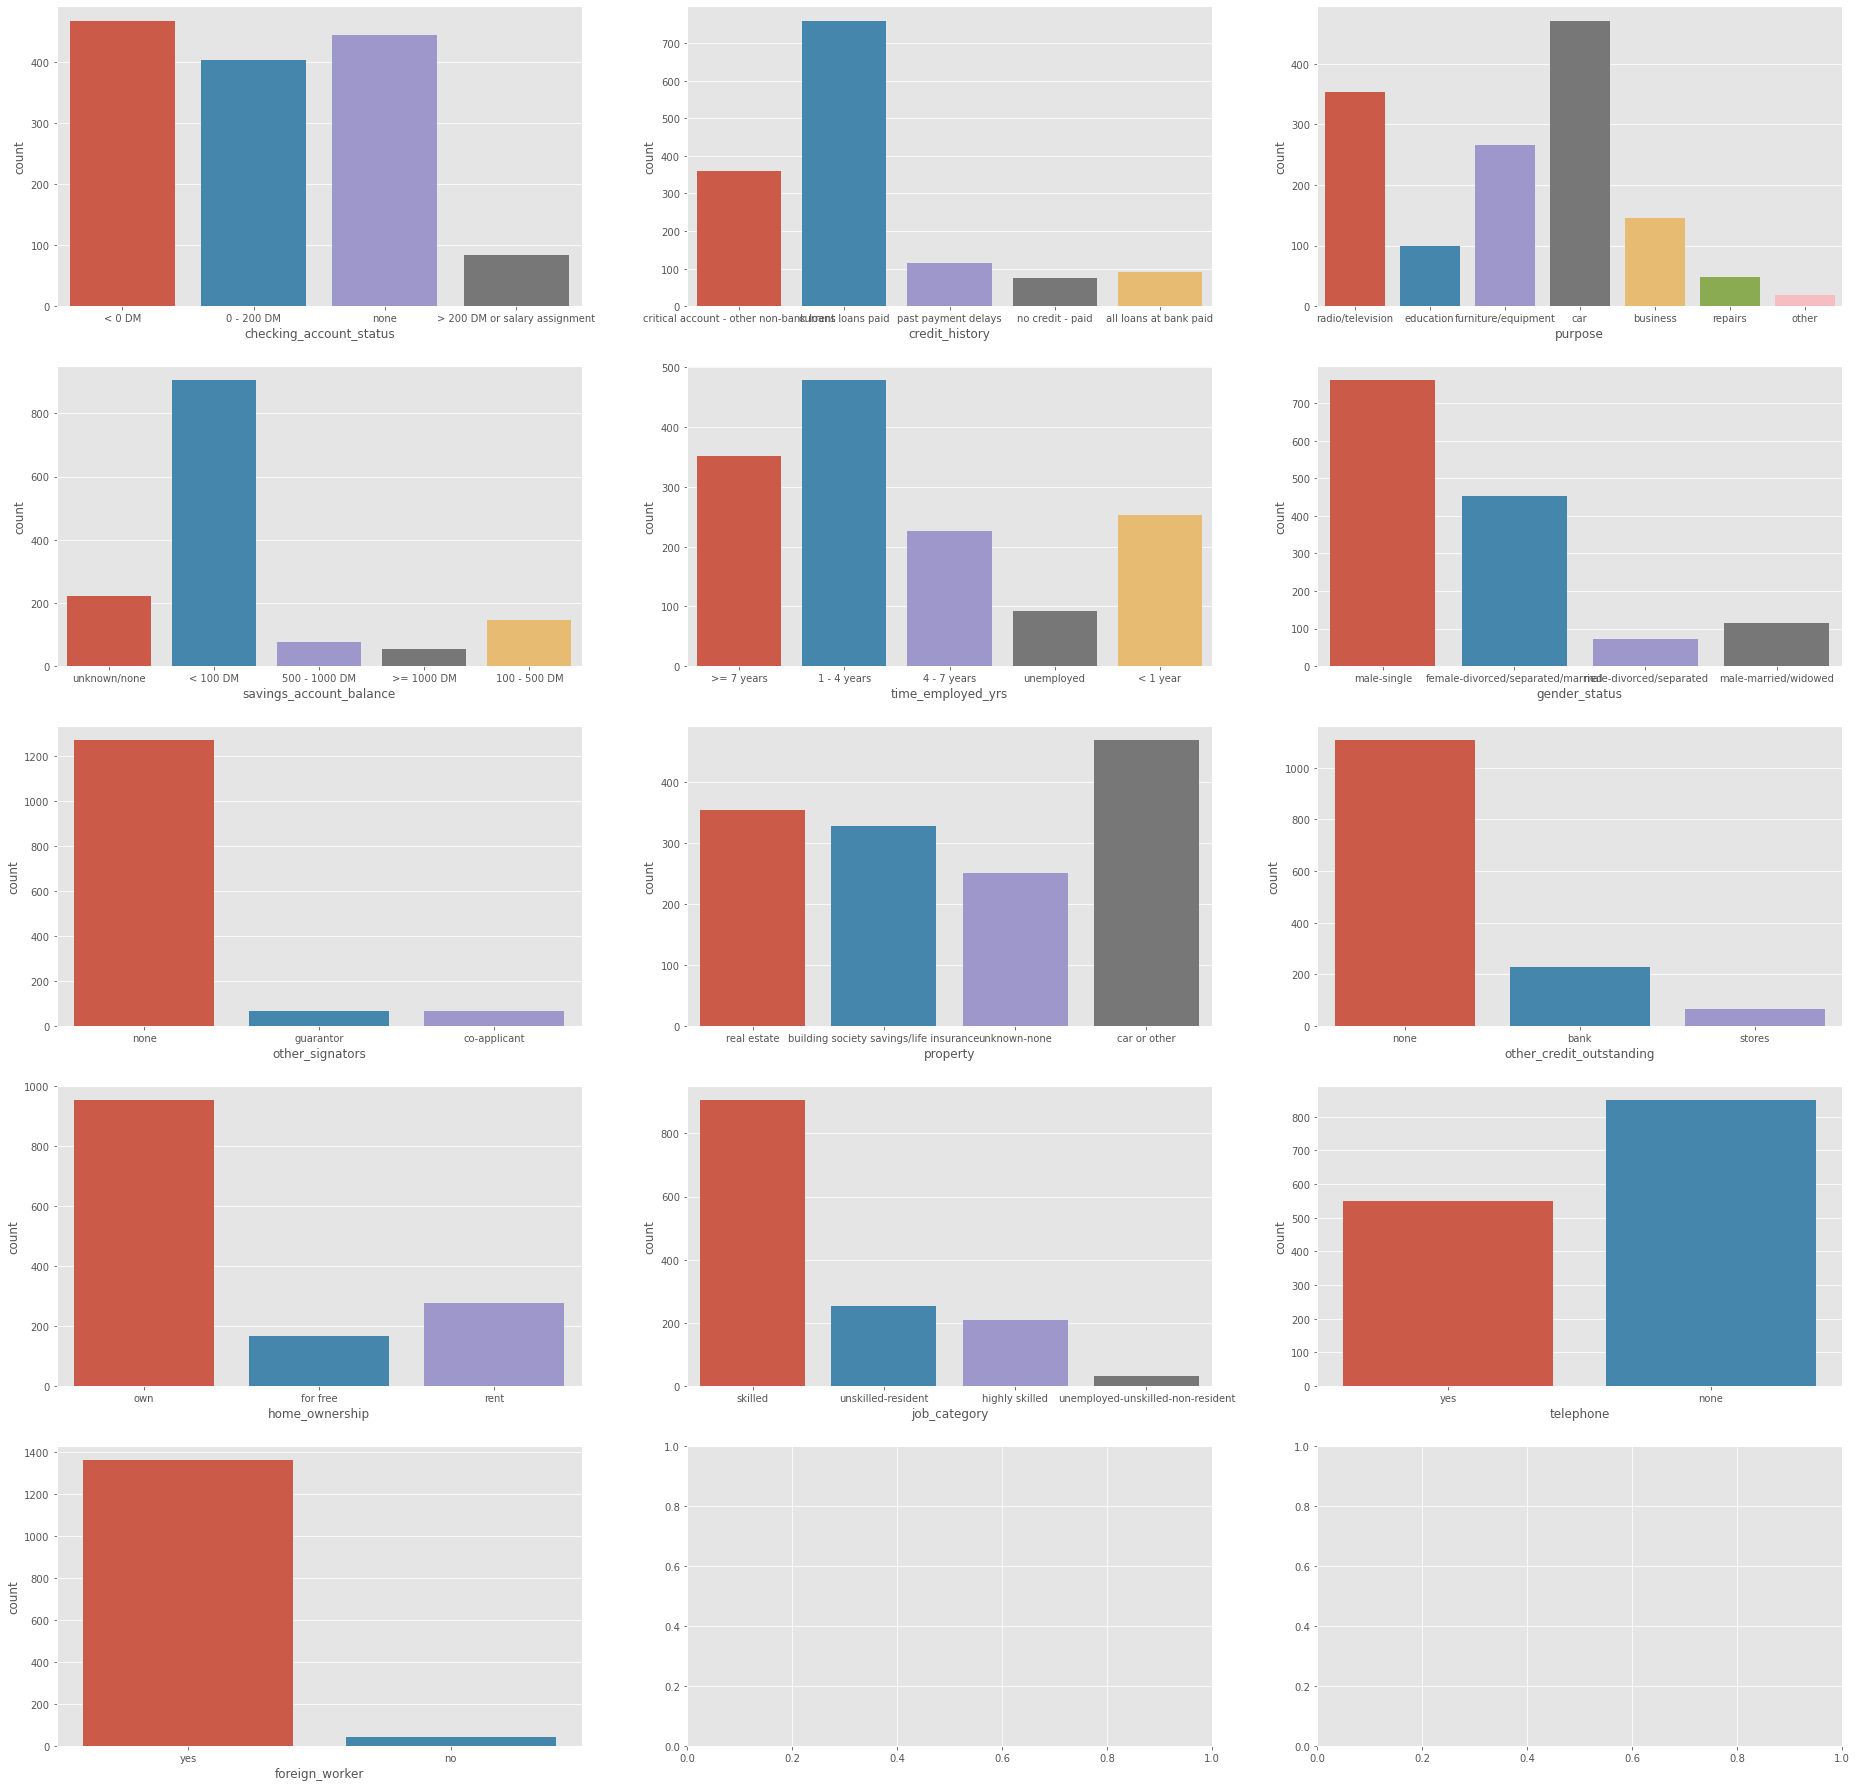

In [9]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 3, 5, 'c', None, (32,32))

In [10]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== checking_account_status ====================
< 0 DM                           468
none                             444
0 - 200 DM                       404
> 200 DM or salary assignment     84
Name: checking_account_status, dtype: int64

===== credit_history ====================
current loans paid                         760
critical account - other non-bank loans    360
past payment delays                        114
all loans at bank paid                      90
no credit - paid                            76
Name: credit_history, dtype: int64

===== purpose ====================
car                    471
radio/television       353
furniture/equipment    266
business               145
education               99
repairs                 48
other                   18
Name: purpose, dtype: int64

===== savings_account_balance ====================
< 100 DM         904
unknown/none     221
100 - 500 DM     145
500 - 1000 DM     77
>= 1000 DM        53
Name: savings_account_balance, dty

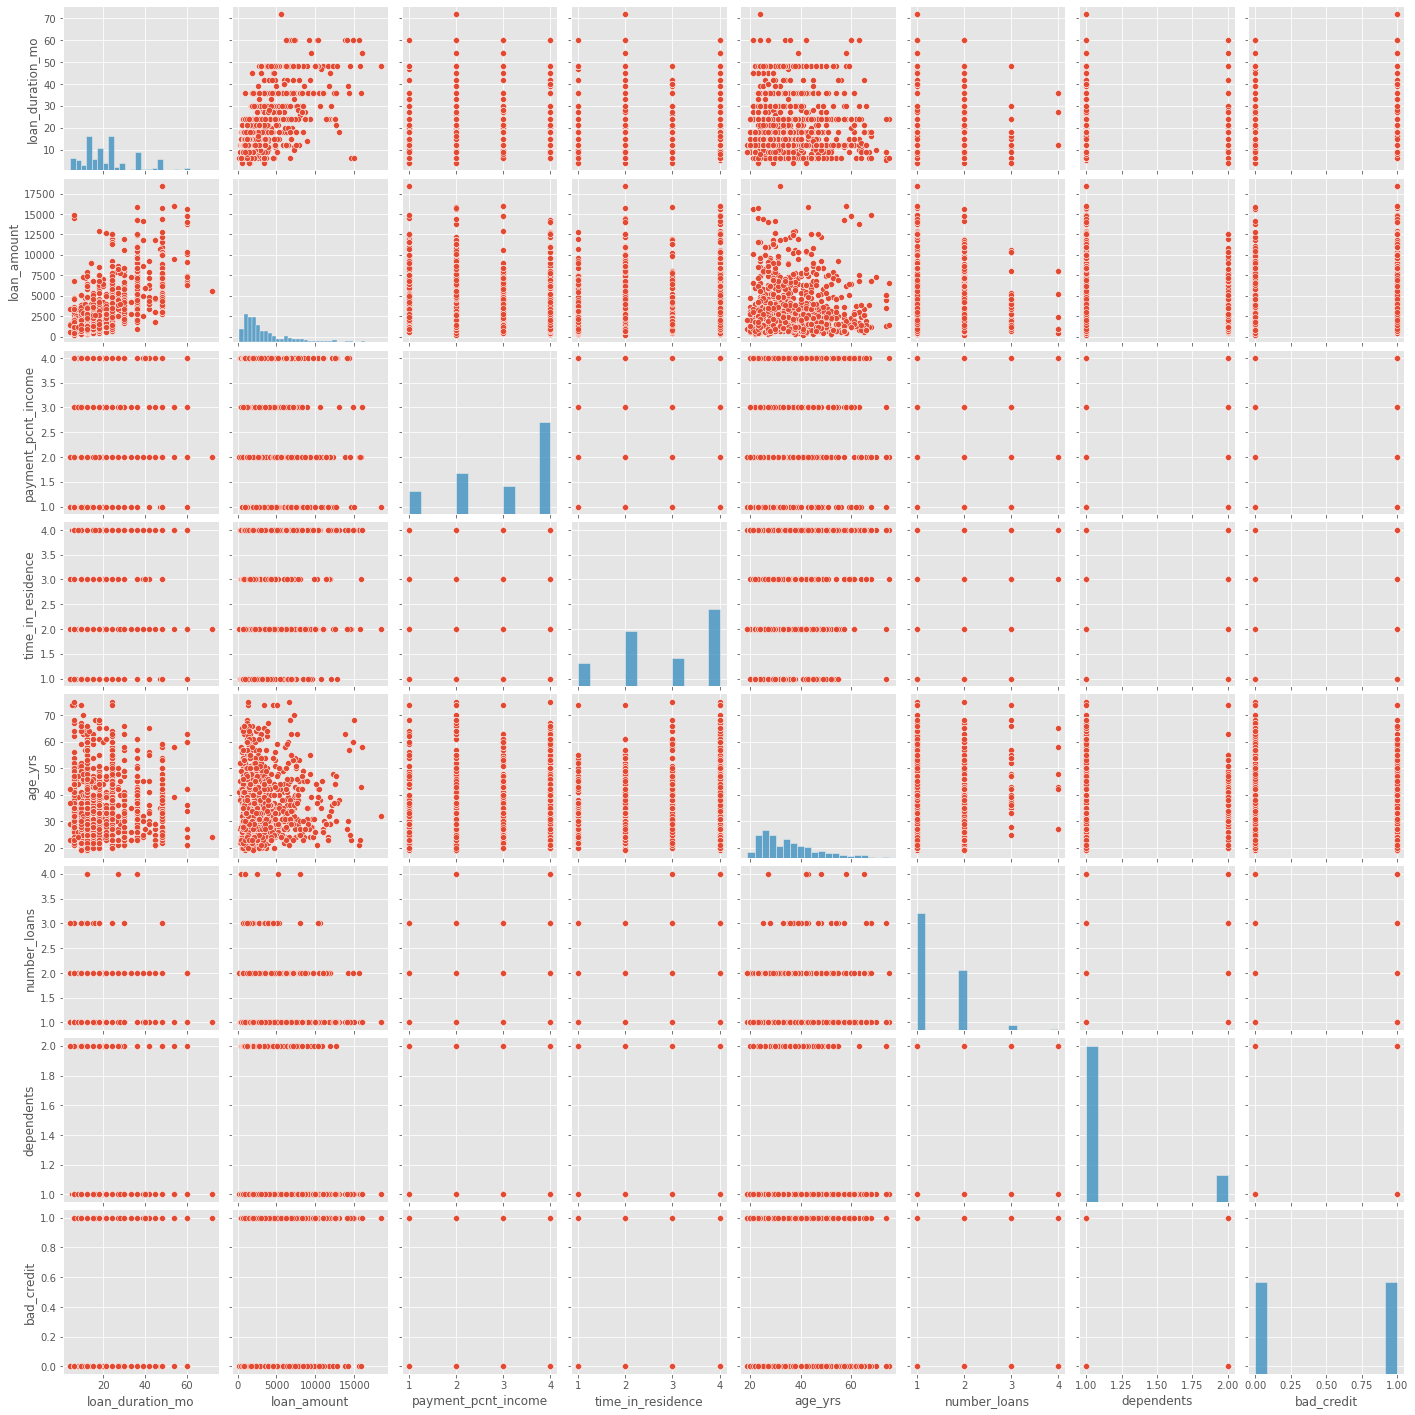

In [11]:
#Visualización de variables numéricas

sns.pairplot(d[numCols])

In [12]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('bad_credit')

### Variable de salida

In [13]:
# Distriución de la variable de salida

d.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

bad_credit
0    700
1    700
Name: bad_credit, dtype: int64

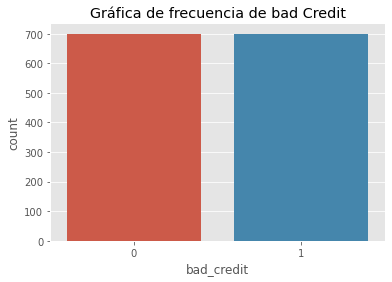

In [14]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de bad Credit')
sns.countplot(d.bad_credit)

plt.show()

## 5. Preparación de datos

### Creación de variables Dummies 

In [15]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   loan_duration_mo                                        1400 non-null   int64
 1   loan_amount                                             1400 non-null   int64
 2   payment_pcnt_income                                     1400 non-null   int64
 3   time_in_residence                                       1400 non-null   int64
 4   age_yrs                                                 1400 non-null   int64
 5   number_loans                                            1400 non-null   int64
 6   dependents                                              1400 non-null   int64
 7   bad_credit                                              1400 non-null   int64
 8   checking_account_status_< 0 DM                          14

## 6. Creación del modelo

### Dividir el conjunto de datos

In [16]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='bad_credit')
y = d['bad_credit']

In [17]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escalar Variables

In [18]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


In [19]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
891,0.1618,0.0869,1.0000,1.0000,0.4821,0.3333,0.0000
72,0.0588,0.0503,0.6667,1.0000,0.5714,0.3333,1.0000
613,0.0882,0.0545,0.0000,1.0000,0.5179,0.0000,1.0000
184,0.2500,0.0769,1.0000,0.3333,0.3750,0.3333,1.0000
428,0.2059,0.1392,0.0000,0.6667,0.0357,0.0000,0.0000


### Creación del modelo

#### Creación y entrenamiento del modelo

In [20]:
#Creación y entrenamiento de los modelos 

modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
modelRanForest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=0).fit(X_train, y_train)
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)

### Evaluación del modelo

In [21]:
y_SVC      = modelSVC.predict(X_test)
y_LR       = modelLR.predict(X_test)
y_knn      = modelknn.predict(X_test)
y_ComplNB  = modelComplNB.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)
y_RanForest= modelRanForest.predict(X_test)
y_NN      = ModelNN.predict(X_test)

#### Exactitud (Accuracy)

In [22]:
print("="*5 + f" Accuracy de los modelos " + "="*20)
print()
print("modelSVC      :",metrics.accuracy_score(y_test, y_SVC      ))
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelknn      :",metrics.accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",metrics.accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",metrics.accuracy_score(y_test, y_RanForest))
print("ModelNN       :",metrics.accuracy_score(y_test, y_NN      ))


===== Accuracy de los modelos ====================

modelSVC      : 0.75
modelLR       : 0.7571428571428571
modelknn      : 0.6964285714285714
modelComplNB  : 0.7642857142857142
modelTreeClas : 0.7642857142857142
modelRanForest: 0.8392857142857143
ModelNN       : 0.8071428571428572


#### Matriz de confusión

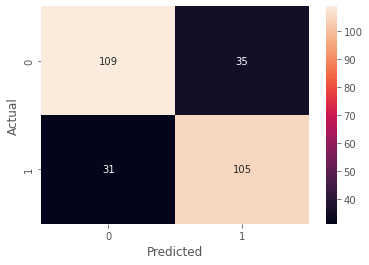

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       144
           1       0.75      0.77      0.76       136

    accuracy                           0.76       280
   macro avg       0.76      0.76      0.76       280
weighted avg       0.76      0.76      0.76       280



In [23]:
y_pred = y_ComplNB

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

#### ROC - Receiver Operating Characteristic

0.82: SVC(kernel='linear', probability=True)
0.83: LogisticRegression(random_state=0)
0.80: KNeighborsClassifier(n_neighbors=31)
0.83: ComplementNB()
0.77: DecisionTreeClassifier(random_state=0)
0.92: RandomForestClassifier(max_depth=8, n_estimators=47, random_state=0)
0.81: MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=0,
              solver='lbfgs')


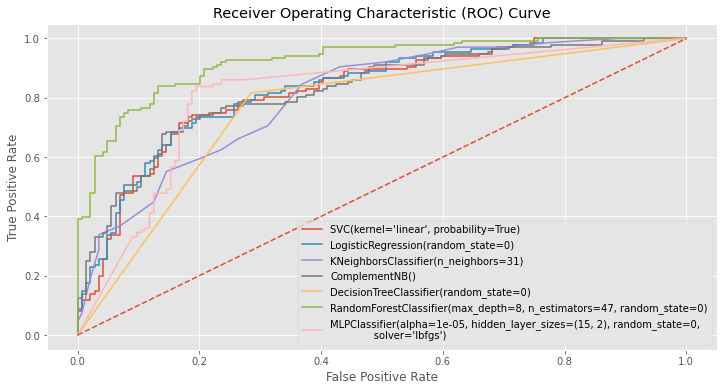

In [24]:
# Crear figura de tamaño 10x6
fig = plt.figure(figsize=(12, 6))  

# Lista de modelos a evaluar
Modelos = [modelSVC, modelLR, modelknn, modelComplNB, modelTreeClas, modelRanForest, ModelNN]  

# Iterar sobre los modelos
for i in range(len(Modelos)):
    
    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test)  
    
    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]  

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test, probs*(1))  

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, probs*(1))  

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])  

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))  


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')  
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico


### Validación Cruzada (***Cross validation***)

#### Selecionar el conjunto de datos

In [25]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns ='bad_credit')
y = d['bad_credit']

# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

#### Escalar variables

In [26]:
# Escalar Variables

#num_vars = numCols

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

#### Ejecucion de diferentes modelos

In [27]:
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelSVC', modelSVC),
    ('modelLR', modelLR),
    ('modelknn', modelknn),
    ('modelComplNB', modelComplNB),
    ('modelTreeClas', modelTreeClas),
    ('modelRanForest', modelRanForest),
    ('modelNN', ModelNN)
]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_Completo, y_Completo, cv=CV, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,modelSVC,0.7571,0.7308,0.8143,0.7703
1,modelSVC,0.6929,0.6849,0.7143,0.6993
2,modelSVC,0.7357,0.7538,0.7000,0.7259
3,modelSVC,0.7286,0.6951,0.8143,0.7500
4,modelSVC,0.7000,0.6795,0.7571,0.7162
...,...,...,...,...,...
65,modelNN,0.8571,0.8289,0.9000,0.8630
66,modelNN,0.8286,0.7738,0.9286,0.8442
67,modelNN,0.8714,0.8514,0.9000,0.8750
68,modelNN,0.8786,0.8272,0.9571,0.8874


#### Evaluación de los modelos

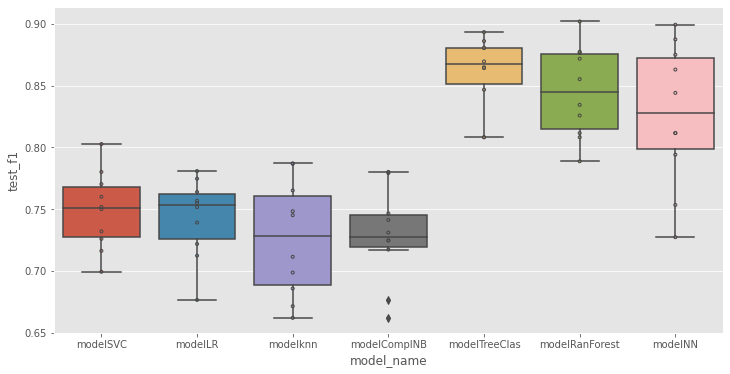

In [40]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df)
sns.stripplot(x='model_name', y='test_f1', data=cv_df, 
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

In [41]:
# impresión de los f1-score de los modelos evaluados
cv_df.groupby('model_name')['test_f1'].mean().sort_values(ascending=False)

model_name
modelTreeClas    0.8602
modelRanForest   0.8452
modelNN          0.8267
modelSVC         0.7488
modelLR          0.7432
modelComplNB     0.7283
modelknn         0.7261
Name: test_f1, dtype: float64

In [42]:
# Impresión de la desvición estándar de f1-score de los modelos evaluados

cv_df.groupby('model_name')['test_f1'].std().sort_values(ascending=True)

model_name
modelTreeClas    0.0304
modelSVC         0.0313
modelLR          0.0318
modelRanForest   0.0369
modelComplNB     0.0381
modelknn         0.0465
modelNN          0.0574
Name: test_f1, dtype: float64

In [57]:
# Impresión de las métricas para un modelo
print(cv_df[cv_df['model_name'] == 'modelTreeClas'])

       model_name  test_accuracy  test_precision  test_recall  test_f1
40  modelTreeClas         0.8000          0.7763       0.8429   0.8082
41  modelTreeClas         0.8571          0.8205       0.9143   0.8649
42  modelTreeClas         0.8500          0.8657       0.8286   0.8467
43  modelTreeClas         0.8000          0.7763       0.8429   0.8082
44  modelTreeClas         0.8857          0.8375       0.9571   0.8933
45  modelTreeClas         0.8714          0.7955       1.0000   0.8861
46  modelTreeClas         0.8643          0.7865       1.0000   0.8805
47  modelTreeClas         0.8643          0.7865       1.0000   0.8805
48  modelTreeClas         0.8500          0.7692       1.0000   0.8696
49  modelTreeClas         0.8429          0.7609       1.0000   0.8642


In [59]:
# Impresión de la metrica media y mediana de f1-score para un modelo espefífico

print(cv_df[cv_df['model_name'] == 'modelTreeClas']['test_f1'].median())
print(cv_df[cv_df['model_name'] == 'modelTreeClas']['test_f1'].mean())

0.8672150411280846
0.8602196869760501


#### Referencias


- Maquinas de vectores de soporte

    - https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python


- *scikit-learn:*   
    - https://scikit-learn.org/stable/modules/svm.html
    
    ROC
    - https://stackabuse.com/understanding-roc-curves-with-python/



- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180



- *Analítica de grandes datos:*
    - https://jdvelasq.github.io/courses/analitica-de-grandes-datos/index.html